In [1]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [7]:
#user-defined function to compute pairwise Pearson correlation coefficients
df=pd.read_csv("iris.csv")
def correlation(a, b):

    mean_a= sum(a)/float(len(a))
    mean_b = sum(b)/float(len(b))

    sub_a = [i-mean_a for i in a]
    sub_b = [i-mean_b for i in b]
    
    numerator = sum([sub_a[i]*sub_b[i] for i in range(len(sub_a))])
    
    std_dev_a = sum([sub_a[i]**2.0 for i in range(len(sub_a))])
    std_dev_b = sum([sub_b[i]**2.0 for i in range(len(sub_b))])
    
    denominator = (std_dev_a*std_dev_b)**0.5
    cor_coefficient = numerator/denominator
    return cor_coefficient

<Figure size 576x576 with 0 Axes>

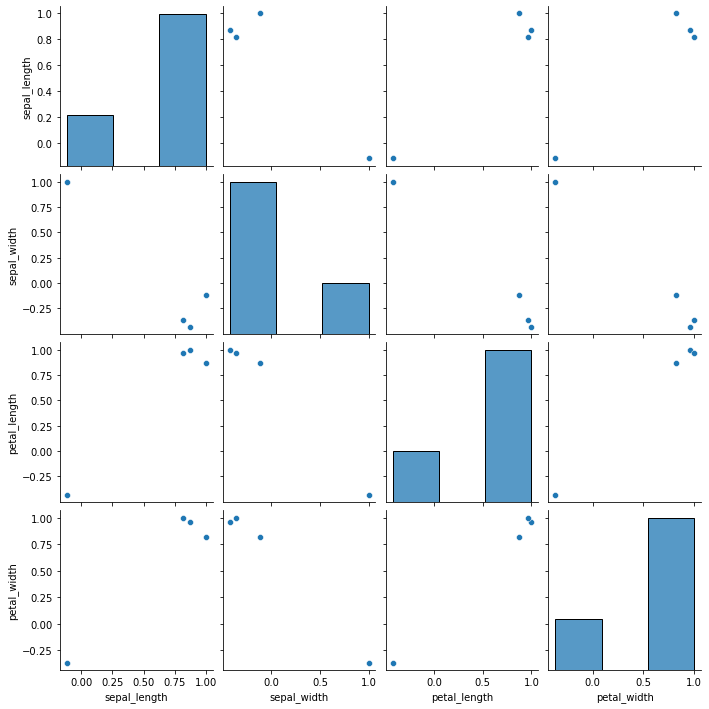

In [8]:
#graphs to visualize the correlation between two variables
cor = df.corr()
round(cor,2)
plt.figure(figsize=(8, 8))
graph = sns.pairplot(cor)
plt.show()

<AxesSubplot:>

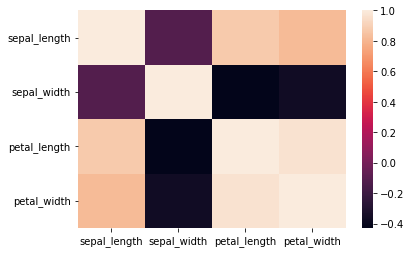

In [9]:
#to visualize the correlation matrix
sns.heatmap(cor)

In [7]:
#z-score standardization on the data
standardized_df=df.iloc[:, :-1] = df.iloc[:, :-1].apply(zscore)
standardized_df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [9]:
#covariance matrix for the standardized data
cov_matrix=standardized_df.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


In [11]:
#eigenvalues and eigenvectors for the covariance matrix in descending order
eigen_values,eigen_vector=np.linalg.eig(cov_matrix)
print('e-value',eigen_values)
print('e-vector',eigen_vector)

e-value [2.93808505 0.9201649  0.14774182 0.02085386]
e-vector [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
